<a href="https://www.kaggle.com/code/mvsaikumar/loan-default-prediction-log-reg-svm-knn?scriptVersionId=108418273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loan Default Prediction

Can you predict if an applicant will default the loan or not in the future?

# Problem Statement

MyHom is a finance company that lends housing loans at the best and most affordable interest rates to customers. In recent times, the company incurred heavy losses due to loan defaults. Most applicants failed to repay the loan as per the promissory note.

In order to avoid such losses, the company has decided to build a system for identifying the loan defaulters automatically based on data. This will help the company to identify the potential applicants and ensure the smooth running of the entire process.

Now, the company challenges the Data Science community to build a smart AI system to predict the probability of an applicant defaulting the loan or not in the future.


# About the Dataset

You are provided with the past applicant’s data containing the demographic information, loan attributes, and target variable indicating if an applicant will default the loan or not.


# Data Dictionary

You are provided with 3 files - train.csv, test.csv, and sample_submission.csv


# Train and Test Data

The train and test set contains the different attributes related to demographic and loan information of the applicants such as age, profession, no. of active loans, loan default in previous loans, and so on. The training set contains the target variable loan_default and you need to predict the target variable in the test set.


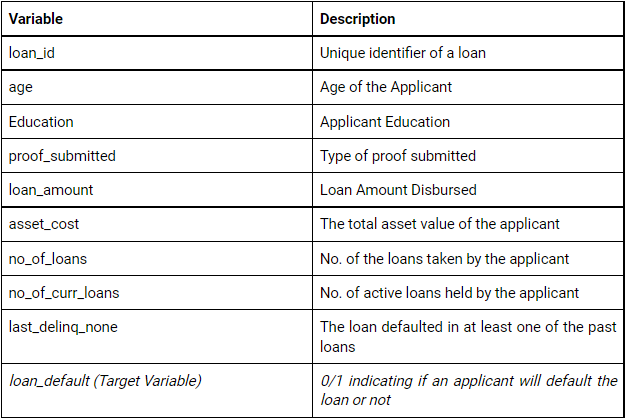


# Submission File Format

<b>sample_submission.csv</b> contains 2 variables - 

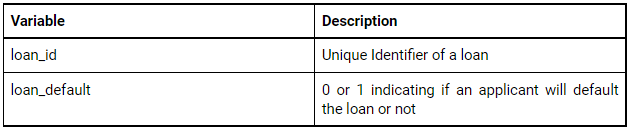


# Evaluation metric

The evaluation metric for this hackathon would be the macro F1 Score.


# Public and Private Split

Test data is further divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.

https://datahack.analyticsvidhya.com/contest/machine-learning-summer-training-hackathon/?utm_source=auto-email#ProblemStatement

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import the Datasets to Pandas dataframe

In [2]:
# Read the dataset

train = pd.read_csv('../input/loan-default-prediction/train_data.csv')
test = pd.read_csv('../input/loan-default-prediction/test_data.csv')

In [3]:
# Print the train & test datasets for first 5 rows

print(train.head() , '\n')
print('---------------------------', '\n')
print(test.head())

   loan_id  age  education proof_submitted  loan_amount  asset_cost  \
0        1   27        1.0          Aadhar       504264      820920   
1        2   48        1.0          Aadhar       728556      831444   
2        3   30        2.0         VoterID       642936      826092   
3        4   28        1.0          Aadhar       746556      930924   
4        5   29        1.0          Aadhar      1139880     1902000   

   no_of_loans  no_of_curr_loans  last_delinq_none  loan_default  
0            2                 2                 0             0  
1            6                 2                 0             0  
2            0                 0                 0             1  
3            0                 0                 0             0  
4            0                 0                 0             0   

--------------------------- 

   loan_id  age  education proof_submitted  loan_amount  asset_cost  \
0     7001   29        1.0          Aadhar       636936      768240 

In [4]:
# check the shapes of the dataset

print('No.of rows and columns in train dataset',train.shape)
print('No.of rows and columns in test dataset',test.shape)

No.of rows and columns in train dataset (7000, 10)
No.of rows and columns in test dataset (3000, 9)


So, in the train data it has 7000 rows i.e., 7000 data points and 10 columns i.e., 10 features/variables. Out of 10 features, 9 are input features and 1 is output feature.

Also, the test data has 3000 rows i.e., 3000 data points and 9 columns i.e., 9 features/variables.

In [5]:
# check column names with data types and other information

print(train.info() , '\n')
print('---------------------------', '\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB
None 

--------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 

In the train dataset, some of the count values in 'education' feature are missing, 'proof_submitted' feature is a categorical variable and remaining features are numeric.

In the test dataset, some of the count values in 'education' feature are missing, 'proof_submitted' feature is a categorical variable and remaining features are numeric.

### Check and Treat Missing Values

Before we go on to build the model, we must look for missing values within the dataset as treating the missing values is a necessary step before we fit a machine learning model on the dataset.

In [6]:
print(train.isnull().sum() , '\n')
print('---------------------------', '\n')
print(test.isnull().sum())

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64 

--------------------------- 

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64


In the train dataset, 245 missing values are there in 'education' feature and in test dataset, 92 missing values are there in 'education' feature.

In [7]:
# copy the dataset to new variables

train2 = train.copy()
test2 = test.copy()

In [8]:
# Print the total no.of values in 'education' column of train and test dataset

print(train2['education'].value_counts(), '\n')
print('---------------------------', '\n')
print(test2['education'].value_counts())

2.0    3796
1.0    2959
Name: education, dtype: int64 

--------------------------- 

2.0    1639
1.0    1269
Name: education, dtype: int64


In [9]:
# Print the mode value of 'education' column of train and test dataset

print(train2['education'].mode(), '\n')
print('---------------------------', '\n')
print(test2['education'].mode())

0    2.0
dtype: float64 

--------------------------- 

0    2.0
dtype: float64


Assuming that category; 1.0 ---> indicates that applicant is not educated,
                        2.0 ---> indicates that applicant is educated.
              
Since there are more applicants under 2.0 category. So replacing the missing values in education field with 'mode' value in both train and test data.

In [10]:
# Replace null values in education column with mode value in train and test data
# Here '0' indicates index of the 2.0 category

train2['education'].fillna(train['education'].mode()[0], inplace=True)
test2['education'].fillna(test['education'].mode()[0], inplace=True)

In [11]:
# check no null/missing values

print(train2.isnull().sum() , '\n')
print('---------------------------', '\n')
print(test2.isnull().sum())

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64 

--------------------------- 

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64


So, there is no missing or empty data here.

### Data Analysis and Data Visualization

In [12]:
# check the data column names

print(train2.columns, '\n')
print('---------------------------', '\n')
print(test2.columns)

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none',
       'loan_default'],
      dtype='object') 

--------------------------- 

Index(['loan_id', 'age', 'education', 'proof_submitted', 'loan_amount',
       'asset_cost', 'no_of_loans', 'no_of_curr_loans', 'last_delinq_none'],
      dtype='object')


#### Analyzing Numerical Columns

In [13]:
# statistical information from train datset

train2.describe()               

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.577286,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.494026,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


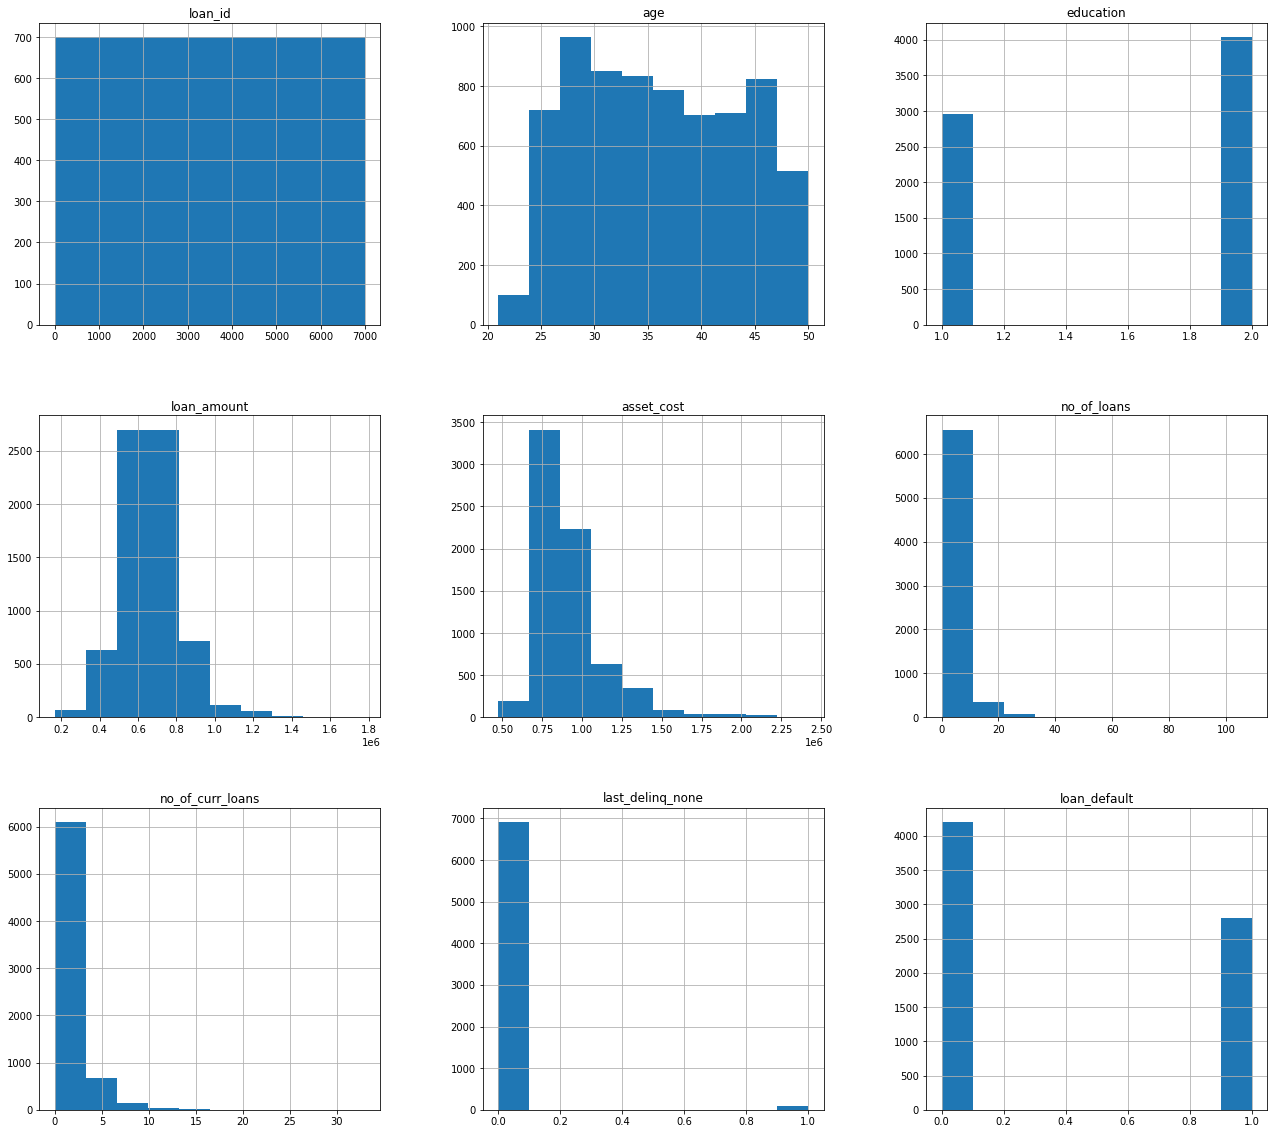

In [14]:
#  check the data distribution of Numerical Columns for train dataset

train2.hist( figsize = (22, 20) )
plt.show()

As we seen that

-From the age feature, most of the applicants falls in the age group 26-29.

-From the education feature, most of the applicants are graduates rather than non-graduates.

-From the loan amount feature, most of the applicants taken loan amount in betwwen 6-7 lakhs.

-Since most of the applicants has more asset cost value. Based on the asset cost value of the applicant, the loan amount can increase.

-From the no.of loans and no.of current loans features, max no.of applicants doesn't taken any loans.

-Also, from the no.of current loans which were still within the applicants may fall into default loan category if they failed to repay the loan as per the promissory note.

In [15]:
# check the count of the variables for train dataset

print(train2['age'].value_counts(), '\n')
print(train2['education'].value_counts(), '\n')
print(train2['loan_amount'].value_counts(), '\n')
print(train2['asset_cost'].value_counts(), '\n')
print(train2['no_of_loans'].value_counts(), '\n')
print(train2['no_of_curr_loans'].value_counts(), '\n')
print(train2['last_delinq_none'].value_counts(), '\n')

28    336
26    326
29    325
27    303
47    291
32    289
33    282
30    281
45    279
31    279
34    278
37    276
35    272
36    264
25    262
46    254
42    247
48    247
38    245
44    241
40    240
41    232
39    232
43    222
49    181
24    130
50     86
23     64
22     32
21      4
Name: age, dtype: int64 

2.0    4041
1.0    2959
Name: education, dtype: int64 

699108    63
639636    62
675108    62
663108    61
615636    61
          ..
795228     1
778368     1
751776     1
266304     1
769656     1
Name: loan_amount, Length: 2655, dtype: int64 

840000     22
936000     20
900000     19
804000     17
852000     17
           ..
998832      1
945228      1
1115340     1
814092      1
900660      1
Name: asset_cost, Length: 5480, dtype: int64 

0      3615
2      1032
3       617
4       377
5       258
6       214
7       144
8       130
9        88
10       80
11       56
13       46
12       46
15       37
14       32
16       31
18       26
17       25
20       2

In [16]:
# check the count of the target variable for train dataset

print(train2['loan_default'].value_counts(), '\n')

0    4200
1    2800
Name: loan_default, dtype: int64 



A loan default occurs when a borrower takes money from a bank and does not repay the loan. People often default on loans due
to various reasons. Borrowers who default on loans not only damage their credit but also risk being sued and having their
wages garnished.

Here 0 ---> indicates doesn't not default on loan, 
     1 ---> indicates deafult on loan
     
From the above, Only a small part(2800) of the target variable (loan deafult) consists of people who default on loans.

In [17]:
# statistical information from test datset

test2.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,8500.500000,36.111000,1.577000,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333
std,866.169729,7.467347,0.494118,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881
min,7001.000000,21.000000,1.000000,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000
25%,7750.750000,30.000000,1.000000,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000
50%,8500.500000,36.000000,2.000000,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000
75%,9250.250000,42.000000,2.000000,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000
max,10000.000000,50.000000,2.000000,1.576920e+06,2.358180e+06,92.000000,32.000000,1.000000


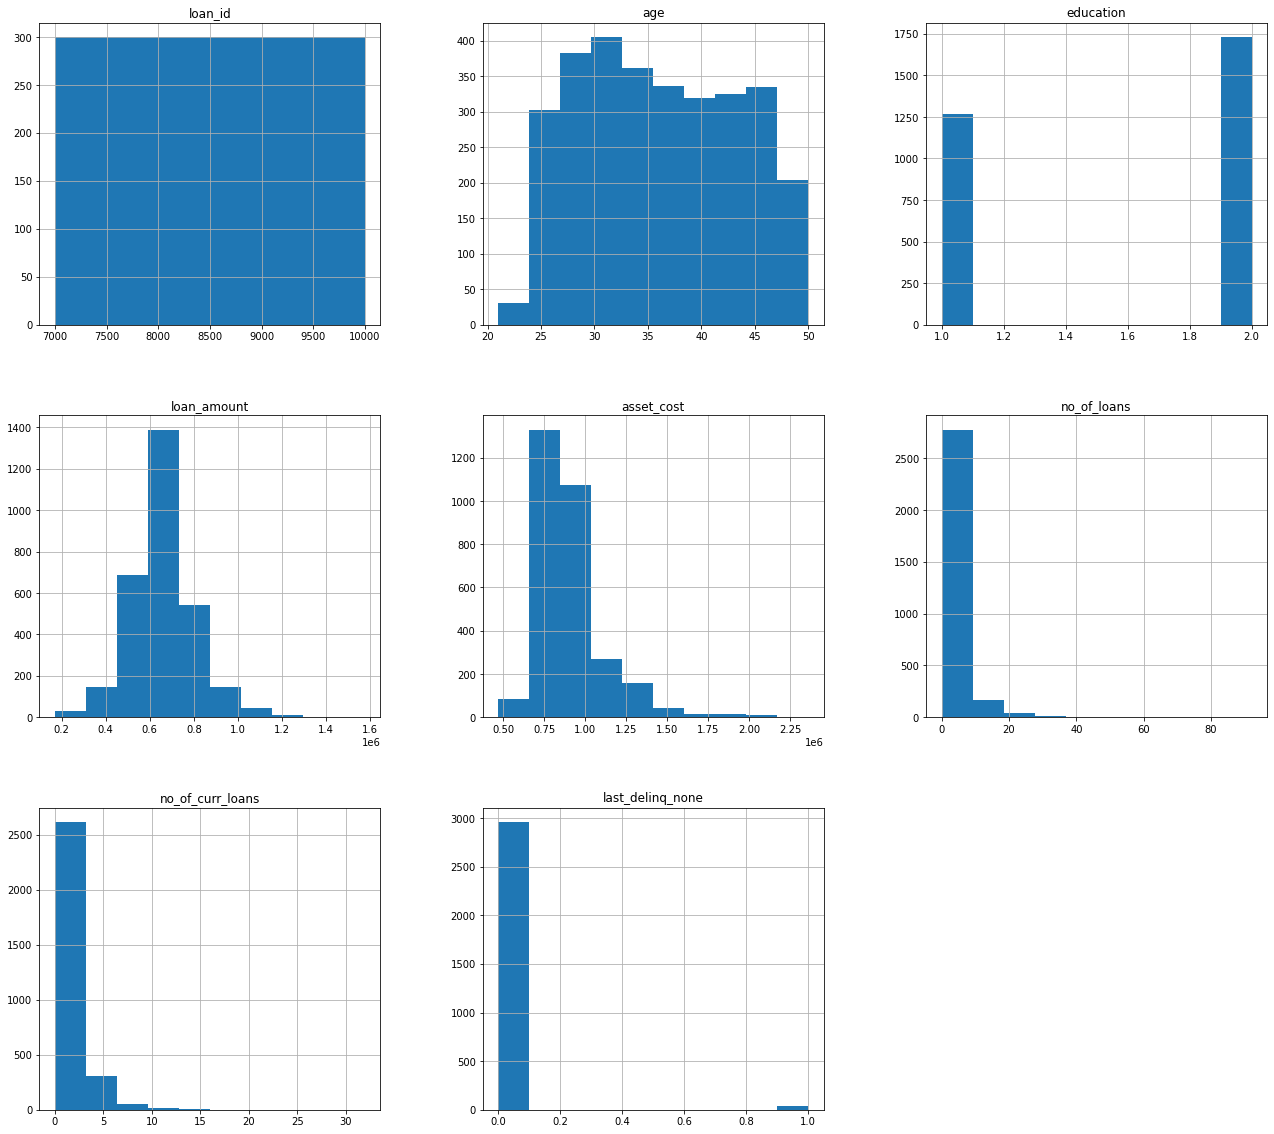

In [18]:
#  check the data distribution of Numerical Columns for test dataset

test2.hist( figsize = (22, 20) )
plt.show()

In [19]:
# check the count of the variables for test dataset

print(test2['age'].value_counts(), '\n')
print(test2['education'].value_counts(), '\n')
print(test2['loan_amount'].value_counts(), '\n')
print(test2['asset_cost'].value_counts(), '\n')
print(test2['no_of_loans'].value_counts(), '\n')
print(test2['no_of_curr_loans'].value_counts(), '\n')
print(test2['last_delinq_none'].value_counts(), '\n')

30    150
37    144
26    141
31    134
42    130
28    129
29    129
33    128
47    126
34    126
27    125
32    121
46    119
41    114
25    110
35    107
40    103
36    103
44    103
39    102
43     92
48     90
38     89
45     89
49     66
24     51
50     48
23     15
22     12
21      4
Name: age, dtype: int64 

2.0    1731
1.0    1269
Name: education, dtype: int64 

639636    26
663108    26
556188    23
699108    22
580188    22
          ..
410520     1
635736     1
789384     1
996384     1
639456     1
Name: loan_amount, Length: 1479, dtype: int64 

894000     8
816000     7
912000     7
804000     7
786000     6
          ..
1520400    1
669384     1
792288     1
884400     1
755160     1
Name: asset_cost, Length: 2613, dtype: int64 

0     1548
2      448
3      246
4      180
5      119
6       80
7       73
8       52
10      34
9       31
11      24
13      23
14      20
12      18
15      15
16      14
17      13
19       8
21       7
20       6
23       4
22    

#### Analysis of categorical feature

In [20]:
# check the count of the proof submitted variable for train and test datset

print(train2['proof_submitted'].value_counts(), '\n')
print('---------------------------', '\n')
print(test2['proof_submitted'].value_counts())

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64 

--------------------------- 

Aadhar      2545
VoterID      295
PAN          112
Driving       43
Passport       5
Name: proof_submitted, dtype: int64


<AxesSubplot:title={'center':'Test2'}, xlabel='proof_submitted', ylabel='count'>

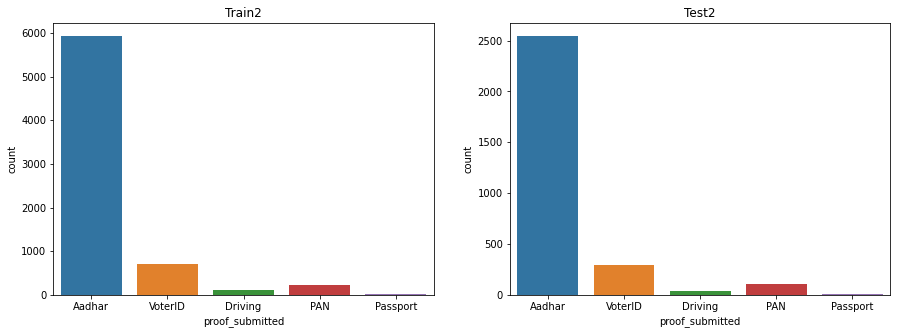

In [21]:
# Bar plot of proof submitted for train and test datset

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=5)

plt.subplot(1,2,1)
plt.title('Train2')
sns.countplot('proof_submitted', data=train2)

plt.subplot(1,2,2)
plt.title('Test2')
sns.countplot('proof_submitted', data=test2)

So, the majority of the people submiited Aadhar as proof.

Now, we understand the relationship between the different data features.

<AxesSubplot:xlabel='education', ylabel='count'>

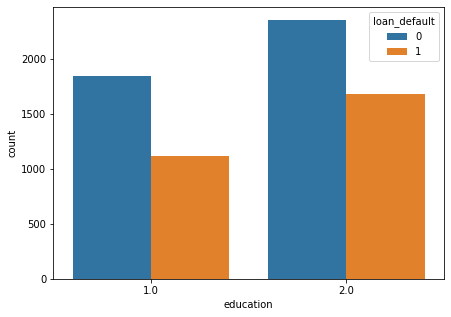

In [22]:
# Education vs loan default in train dataset

plt.figure(figsize=(7,5))
sns.countplot(x='education',hue='loan_default',data=train2)

As more no.of applicants are educated than non-educated applicants. Therfore, maximum no.of educated applicants doesn't come under loan default category if they repay the loan correctly basis.

<AxesSubplot:title={'center':'Test2'}, xlabel='education', ylabel='count'>

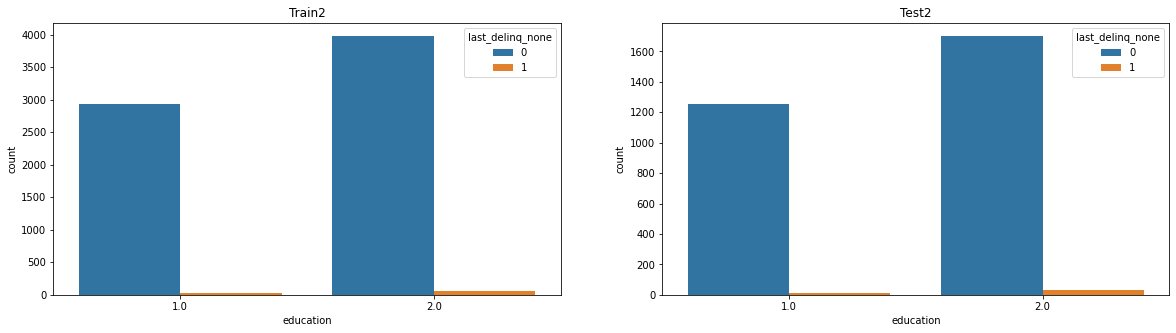

In [23]:
# Education vs last_delinq_none in train and test dataset

plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=5)

plt.subplot(1,2,1)
plt.title('Train2')
sns.countplot(x='education',hue='last_delinq_none',data=train2)

plt.subplot(1,2,2)
plt.title('Test2')
sns.countplot(x='education',hue='last_delinq_none',data=test2)

Here 0 --> indicates loan doesn't defaulted in atleast one of the past loans, 
     1 --> indicates loan defaulted in atleast one of the past loans, 
     
As more no.of educated applicants doesn't defaulted the loan atleast one of the past loans. also, no.of applicants deafulted the loan  in atleast one of the past loans.

<AxesSubplot:xlabel='last_delinq_none', ylabel='age'>

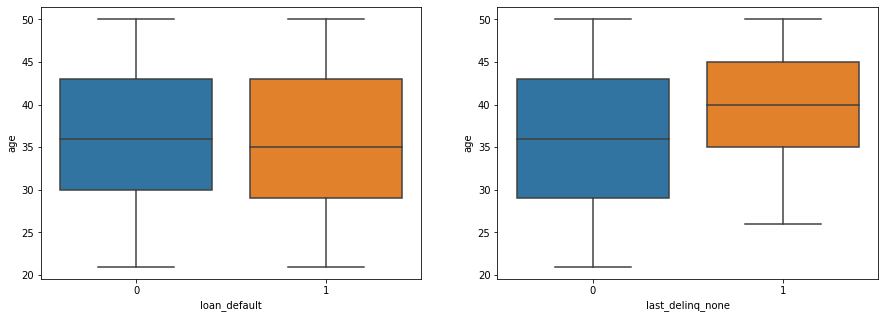

In [24]:
# Age vs loan_default, Age vs last deling none in train dataset

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=5)

plt.subplot(1,2,1)
sns.boxplot(x='loan_default', y='age' ,data = train2)

plt.subplot(1,2,2)
sns.boxplot(x='last_delinq_none', y='age' ,data = train2)

<AxesSubplot:xlabel='last_delinq_none', ylabel='age'>

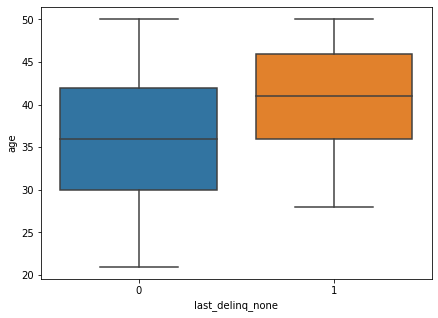

In [25]:
# Age vs last deling none in test dataset

plt.figure(figsize=(7,5))
sns.boxplot(x='last_delinq_none', y='age' ,data = test2)

### Data Preprocessing

Data preparation is a required process in the field of data science before moving on to modelling. In the data preparation
process, we must complete a number of tasks. One of these critical responsibilities is the encoding of categorical data. 

Encoding categorical data is the process of turning categorical data into integer format so that data with transformed
categorical values may be fed into models to increase prediction accuracy.

To convert categorical features into integer format we are using one hot encoding. With One hot, we covert categorical value into a new categorical column and assign a binary value of 0 or 1 to those columns.

In [26]:
# Import the one-hot encoder from sklearn library

from sklearn.preprocessing import OneHotEncoder

In [27]:
# define the model

oHE = OneHotEncoder(sparse = False)

In [28]:
# OHE for proof submitted feature from train dataset

print(train2['proof_submitted'].value_counts().to_frame().sort_values('proof_submitted'))

          proof_submitted
Passport               13
Driving               114
PAN                   235
VoterID               707
Aadhar               5931


In [29]:
proof_submitted1 = pd.DataFrame(oHE.fit_transform(train2[['proof_submitted']]))
proof_submitted1.columns = ['proof_submitted_Passport','proof_submitted_Driving','proof_submitted_PAN','proof_submitted_VoterID','proof_submitted_Aadhar']
print(proof_submitted1.head())

   proof_submitted_Passport  proof_submitted_Driving  proof_submitted_PAN  \
0                       1.0                      0.0                  0.0   
1                       1.0                      0.0                  0.0   
2                       0.0                      0.0                  0.0   
3                       1.0                      0.0                  0.0   
4                       1.0                      0.0                  0.0   

   proof_submitted_VoterID  proof_submitted_Aadhar  
0                      0.0                     0.0  
1                      0.0                     0.0  
2                      0.0                     1.0  
3                      0.0                     0.0  
4                      0.0                     0.0  


In [30]:
# OHE for proof submitted feature from test dataset

print(test2['proof_submitted'].value_counts().to_frame().sort_values('proof_submitted'))

          proof_submitted
Passport                5
Driving                43
PAN                   112
VoterID               295
Aadhar               2545


In [31]:
proof_submitted2 = pd.DataFrame(oHE.fit_transform(test2[['proof_submitted']]))
proof_submitted2.columns = ['proof_submitted_Passport','proof_submitted_Driving','proof_submitted_PAN','proof_submitted_VoterID','proof_submitted_Aadhar']
print(proof_submitted2.head())

   proof_submitted_Passport  proof_submitted_Driving  proof_submitted_PAN  \
0                       1.0                      0.0                  0.0   
1                       1.0                      0.0                  0.0   
2                       1.0                      0.0                  0.0   
3                       1.0                      0.0                  0.0   
4                       1.0                      0.0                  0.0   

   proof_submitted_VoterID  proof_submitted_Aadhar  
0                      0.0                     0.0  
1                      0.0                     0.0  
2                      0.0                     0.0  
3                      0.0                     0.0  
4                      0.0                     0.0  


In [32]:
# combine the train2 and proof submitted 1 data frames

train2_1 = pd.concat([train2, proof_submitted1], axis =1)
print(train2_1.shape, '\n')
print(train2_1.head(5))

(7000, 15) 

   loan_id  age  education proof_submitted  loan_amount  asset_cost  \
0        1   27        1.0          Aadhar       504264      820920   
1        2   48        1.0          Aadhar       728556      831444   
2        3   30        2.0         VoterID       642936      826092   
3        4   28        1.0          Aadhar       746556      930924   
4        5   29        1.0          Aadhar      1139880     1902000   

   no_of_loans  no_of_curr_loans  last_delinq_none  loan_default  \
0            2                 2                 0             0   
1            6                 2                 0             0   
2            0                 0                 0             1   
3            0                 0                 0             0   
4            0                 0                 0             0   

   proof_submitted_Passport  proof_submitted_Driving  proof_submitted_PAN  \
0                       1.0                      0.0                  0.0 

In [33]:
# combine the test2 and proof submitted 2 data frames

test2_1 = pd.concat([test2, proof_submitted2], axis =1)
print(test2_1.shape, '\n')
print(test2_1.head(5))

(3000, 14) 

   loan_id  age  education proof_submitted  loan_amount  asset_cost  \
0     7001   29        1.0          Aadhar       636936      768240   
1     7002   28        1.0          Aadhar       548988      693060   
2     7003   28        1.0          Aadhar       651756      936600   
3     7004   45        2.0          Aadhar       614676      744840   
4     7005   48        1.0          Aadhar       625236      839400   

   no_of_loans  no_of_curr_loans  last_delinq_none  proof_submitted_Passport  \
0            2                 2                 0                       1.0   
1            3                 3                 0                       1.0   
2            0                 0                 0                       1.0   
3            4                 3                 0                       1.0   
4            0                 0                 0                       1.0   

   proof_submitted_Driving  proof_submitted_PAN  proof_submitted_VoterID  \
0  

### Scaling Numerical Features 

In [34]:
# Import standard scalar from sklearn library

from sklearn.preprocessing import StandardScaler

In [35]:
num_cols = ['loan_amount','asset_cost']

In [36]:
std = StandardScaler()             # create the standard scalar model

In [37]:
scaled_train2 = std.fit_transform(train2_1[num_cols])     # fit the train dataset to the standard scaler
scaled_train2 = pd.DataFrame(scaled_train2,columns=num_cols)  # Transform the dataset to a pandas dataframe

print(scaled_train2.head())

   loan_amount  asset_cost
0    -1.062009   -0.444709
1     0.435246   -0.395640
2    -0.136308   -0.420594
3     0.555405    0.068186
4     3.181030    4.595834


In [38]:
scaled_test2 = std.fit_transform(test2_1[num_cols])     # fit the test dataset to the standard scaler
scaled_test2 = pd.DataFrame(scaled_test2,columns=num_cols)  # Transform the datset to a pandas dataframe

print(scaled_test2.head())

   loan_amount  asset_cost
0    -0.179170   -0.687752
1    -0.785388   -1.050952
2    -0.077017    0.125608
3    -0.332606   -0.800799
4    -0.259817   -0.343973


### Combine column dataframes

In [39]:
train2_1 = train2_1.drop(columns = num_cols,axis = 1)   # Dropping the 'num_cols' variables from 'train2_1' dataset
train3 = train2_1.merge(scaled_train2,left_index=True,right_index=True,how = "left")   # Merge the 'train2_1' dataset and 'scaled_train2' dataset

In [40]:
train3.head()

,loan_id,age,education,proof_submitted,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Passport,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_VoterID,proof_submitted_Aadhar,loan_amount,asset_cost
0,1,27,1.0,Aadhar,2,2,0,0,1.0,0.0,0.0,0.0,0.0,-1.062009,-0.444709
1,2,48,1.0,Aadhar,6,2,0,0,1.0,0.0,0.0,0.0,0.0,0.435246,-0.395640
2,3,30,2.0,VoterID,0,0,0,1,0.0,0.0,0.0,0.0,1.0,-0.136308,-0.420594
3,4,28,1.0,Aadhar,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.555405,0.068186
4,5,29,1.0,Aadhar,0,0,0,0,1.0,0.0,0.0,0.0,0.0,3.181030,4.595834


In [41]:
train3.shape

(7000, 15)

In [42]:
test2_1 = test2_1.drop(columns = num_cols,axis = 1)   # Dropping the 'num_cols' variables from 'test2_1' dataset
test3 = test2_1.merge(scaled_test2,left_index=True,right_index=True,how = "left")   # Merge the 'test2_1' dataset and 'scaled_test2' dataset

In [43]:
test3.head()

,loan_id,age,education,proof_submitted,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Passport,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_VoterID,proof_submitted_Aadhar,loan_amount,asset_cost
0,7001,29,1.0,Aadhar,2,2,0,1.0,0.0,0.0,0.0,0.0,-0.179170,-0.687752
1,7002,28,1.0,Aadhar,3,3,0,1.0,0.0,0.0,0.0,0.0,-0.785388,-1.050952
2,7003,28,1.0,Aadhar,0,0,0,1.0,0.0,0.0,0.0,0.0,-0.077017,0.125608
3,7004,45,2.0,Aadhar,4,3,0,1.0,0.0,0.0,0.0,0.0,-0.332606,-0.800799
4,7005,48,1.0,Aadhar,0,0,0,1.0,0.0,0.0,0.0,0.0,-0.259817,-0.343973


In [44]:
test3.shape

(3000, 14)

train3 and test3 are new datsets

### Splitting the data into train and test

The train-test split is used to measure the performance of machine learning models relevant to prediction-based
Algorithms/Applications. This approach is a quick and simple procedure that allows us to compare our own machine learning
model outcomes to machine results. By default, the Test set is made up of 30% of the real data, whereas the Training set is made up of 70% of the actual data.
But We have taken the test size to be 25% of the entire data.

In [45]:
# separating the data and label from train data   //Train3

X = train3.drop(columns=['proof_submitted','loan_default'],axis=1)
Y = train3['loan_default']

In [46]:
# Import the train-test split from sklearn library 

from sklearn.model_selection import train_test_split

In [47]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(7000, 13) (5250, 13) (1750, 13)


Since the train and test data are splitted train data takes 75% and test data takes 25%. So X_train has 5250 rows and 13 columns and X_test has 1750 rows and 13 columns.

### Model Development with Logistic Regression

It is a classification not a regression algorithm. It is used to estimate discrete values (Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s).

In [49]:
# Import the logistic regression from sklearn

from sklearn.linear_model import LogisticRegression

In [50]:
LG= LogisticRegression()      # create a logreg model

LG.fit(X_train,Y_train)       # Fit the X_train and Y_train data to the logreg model

LogisticRegression()

In [51]:
# check coefficients

print('Coefficients :' , LG.coef_ , 'Intercept :', LG.intercept_, '\n')
print('Coefficient of determination : ', LG.score(X_train, Y_train))

Coefficients : [[ 9.46012410e-06 -8.51582580e-03  1.09359130e-01 -2.78908812e-03
  -6.31778387e-02  4.95183197e-02 -1.93277500e-01  1.59563715e-02
  -2.12021573e-02 -9.73895774e-03  1.39384123e-01  4.32352431e-01
  -2.38550191e-01]] Intercept : [-0.06893638] 

Coefficient of determination :  0.604


In [52]:
# predict on the validation set(X_test)

y_pred = pd.Series(LG.predict(X_test))
y_pred.value_counts()

0    1581
1     169
dtype: int64

In [53]:
# Import evaluation metrics from sklearn

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score

[[963  87]
 [618  82]] 



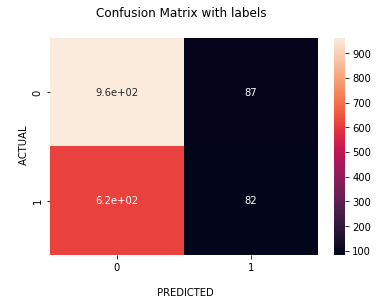

In [54]:
# visualize confusion matrix for logreg

cm = confusion_matrix(Y_test, y_pred)
print(cm, '\n')

cmp = sns.heatmap(cm, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')

cmp.xaxis.set_ticklabels(['0', '1'])
cmp.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [55]:
# classification report for logreg

print(classification_report(Y_test, y_pred, target_names = ['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.61      0.92      0.73      1050
     class 1       0.49      0.12      0.19       700

    accuracy                           0.60      1750
   macro avg       0.55      0.52      0.46      1750
weighted avg       0.56      0.60      0.51      1750



In [56]:
# Accuracy score  & AU-ROC score for logreg

print(f"Accuracy score: { round(accuracy_score(Y_test, y_pred)*100, 4) }")
print(f"AUC-ROC Score: { round(roc_auc_score(Y_test, y_pred)*100, 4) }")

Accuracy score: 59.7143
AUC-ROC Score: 51.7143


### Model Development with Support Vector Machine

In this algorithm, we plot each data item as a point in ndimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate.

In [ ]:
# Import the Support vector machine from sklearn

from sklearn import svm

# create a classifer model and fit it to Xtrain and Ytrain

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

In [ ]:
# check coefficients for svm

print('Coefficients :' , classifier.coef_ , 'Intercept :', classifier.intercept_, '\n')
print('Coefficient of determination : ', classifier.score(X_train, Y_train))

In [ ]:
# predict on the validation set(X_test) for svm

y_pred_svm = pd.Series(classifier.predict(X_test))
y_pred_svm.value_counts()

In [ ]:
# visualize confusion matrix for svm

cm = confusion_matrix(Y_test, y_pred_svm)
print(cm, '\n')

cmp = sns.heatmap(cm, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')

cmp.xaxis.set_ticklabels(['0', '1'])
cmp.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
# classification report for svm

print(classification_report(Y_test, y_pred_svm, target_names = ['class 0', 'class 1']))

In [ ]:
# Accuracy score  & AU-ROC score for svm

print(f"Accuracy score: { round(accuracy_score(Y_test, y_pred_svm)*100, 4) }")
print(f"AUC-ROC Score: { round(roc_auc_score(Y_test, y_pred_svm)*100, 4) }")

### Model Development with K-Nearest neighbours

It can be used for both classification and regression problems. However, it is more widely used 
in classification problems in the industry. K nearest neighbors is a simple algorithm that stores 
all available cases and classifies new cases by a majority vote of its k neighbors.

In [ ]:
# Import KNN classifier from sklearn

from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(X_train, Y_train)

In [ ]:
# Predicting over the Train Set 

y_pred_knn = pd.Series(clf.predict(X_test))
y_pred_knn.value_counts()

In [ ]:
# visualize confusion matrix for knn

cm = confusion_matrix(Y_test, y_pred_knn)
print(cm, '\n')

cmp = sns.heatmap(cm, annot = True)

cmp.set_title('Confusion Matrix with labels \n')
cmp.set_xlabel('\n PREDICTED')
cmp.set_ylabel('\n ACTUAL')

cmp.xaxis.set_ticklabels(['0', '1'])
cmp.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
# classification report for knn

print(classification_report(Y_test, y_pred_knn, target_names = ['class 0', 'class 1']))

In [ ]:
# Accuracy score  & AU-ROC score for knn

print(f"Accuracy score: { round(accuracy_score(Y_test, y_pred_knn)*100, 4) }")
print(f"AUC-ROC Score: { round(roc_auc_score(Y_test, y_pred_knn)*100, 4) }")

### Conclusions

In the above three cases logistic regression model performed well in predicting the applicant will default the loan or not.

### Apply the Logistic Regression model to the Test set (test3)

In [ ]:
test3_drop= test3.drop(columns=['proof_submitted'],axis=1)

In [ ]:
## compare columns in the train and test sets (train3 & test3)

print('Columns in both X_test & test3', X_test.columns.intersection(test3.columns), '\n')
print('Columns in X_test but not in test3', X_test.columns.difference(test3.columns), '\n')
print('Columns in test3 but not in X_test', test3.columns.difference(X_test.columns))

In [ ]:
## create missing column in test3 with 0

test3['proof_submitted'] = 0

In [ ]:
y_pred_Test = pd.Series(LG.predict(test3_drop))
y_pred_Test.value_counts()

In [ ]:
## predict on the Test set

id = test['loan_id'].to_frame('loan_id').reset_index(drop = True)
ld = y_pred_Test.to_frame('loan_default').reset_index(drop = True)

In [ ]:
df_LG = pd.concat([id, ld], axis = 1)
print(df_LG )

In [ ]:
# create the .csv file

df_LG.to_csv("sample_submission.csv", index = False)